# 549. Расстояние редактирования ✅

Даны строки $s$ и $t$.

Найдите взвешенное расстояние редактирования (Расстояние Левенштейна) при стоимости вставки
$I$, удаления $D$, замены $S$.

**Формат ввода**

В первой строке два целых числа $n$ и $m (1≤n,m≤1000)$, длины строк $s$ и $t$ соответственно.

Во второй строке дано $s$, $s$ состоит из маленьких букв английского алфавита.

В третьей строке дано $t$, $t$ состоит из маленьких букв английского алфавита.

В четвертой строке три целых числа $I,
D$ и $S (1≤I,D,S≤100)$.

**Формат вывода**

Выведите одно число — минимальную стоимость получения $t$ из $s$ с использованием операций вставки символа, удаления символа и замены символа на любой другой.

In [ ]:
n, m = list(map(int, input().split()))
s = input()
t = input()
I, D, S = list(map(int, input().split()))

In [ ]:
def levenshtein_distance(n, m, s, t, I, D, S):
    # Инициализация матрицы dp размером (n+1) x (m+1)
    dp = [[0] * (m + 1) for _ in range(n + 1)]

    # Инициализация базовых случаев
    for i in range(1, n + 1):
        dp[i][0] = i * D
    for j in range(1, m + 1):
        dp[0][j] = j * I

    # Заполнение матрицы dp
    for i in range(1, n + 1):
        for j in range(1, m + 1):
            if s[i - 1] == t[j - 1]:
                cost_replace = 0
            else:
                cost_replace = S

            dp[i][j] = min(dp[i][j - 1] + I,    # Вставка
                           dp[i - 1][j] + D,    # Удаление
                           dp[i - 1][j - 1] + cost_replace)  # Замена

    # Возвращаем минимальную стоимость преобразования s в t
    return dp[n][m]

# Пример использования
# 7 11
# coderun
# competition
# 1 1 1

# 7 11
# coderun
# competition
# 1 1 100

# 7 11
# coderun
# competition
# 100 1 1

# 7 11
# coderun
# competition
# 1 100 1

n, m = list(map(int, input().split()))
s = input()
t = input()
I, D, S = list(map(int, input().split()))

print(levenshtein_distance(n, m, s, t, I, D, S))

7


# 550. Опять эти опечатки

Будем говорить, что две строки $s$ и $t$ похожи, если редакционное расстояние между ними не превосходит определенной величины $k$. Для заданных пар строк выясните, похожи ли они.

**Формат ввода**

В первой строке записано целое число $n$ − количество тестовых случаев $(1≤n≤1000)$.

Описание каждого тестового случая занимает три строки. В первой строке находится целое число $k$ − параметр похожести $(1≤k≤20)$. Во второй строке записана строка $s$, в третьей − строка $t$.

Все строки непустые и содержат только строчные буквы английского алфавита. Длина каждой не превосходит $10000$.

**Формат вывода**

Для каждого тестового случая выведите в отдельной строке слово $Yes$, если редакционное расстояние не превосходит заданного параметра $k$, или слово $No$ в противном случае. Регистр букв не имеет значения.

In [ ]:
t = int(input())
k = int(input())
I, D, S = list(map(int, input().split()))


In [ ]:
def levenshtein_distance_with_limit(s, t, k):
    n, m = len(s), len(t)

    if abs(n - m) > k:
        return False

    prev_row = list(range(m + 1))
    curr_row = [0] * (m + 1)

    for i in range(1, n + 1):
        curr_row[0] = i
        min_cost = curr_row[0]

        for j in range(1, m + 1):
            insert_cost = prev_row[j] + 1
            delete_cost = curr_row[j - 1] + 1
            replace_cost = prev_row[j - 1] + (s[i - 1] != t[j - 1])
            curr_row[j] = min(insert_cost, delete_cost, replace_cost)
            min_cost = min(min_cost, curr_row[j])

        if min_cost > k:
            return False

        prev_row, curr_row = curr_row, prev_row

    return prev_row[m] <= k

# n = int(input())
# for i in range(n):
#     k = int(input())
#     t = input()
#     s = input()
# 3
# 1
# run
# code
# 2
# run
# code
# 20
# run
# code

# 10
# 4
# abacaba
# abaaba
# 4
# abacaba
# abacaba
# 4
# abacaba
# acc
# 4
# abacaba
# abacaa
# 4
# abacaba
# b
# 4
# abacaba
# abacaaa
# 4
# abacaba
# babcaabab -
# 4
# abacaba
# abbacaca
# 4
# abacaba
# bacaa
# 4
# abacaba
# acbacbab

# n = 3
# k = [1,2,20]
# t = ['run', 'run', 'run']
# s = ['code', 'code', 'code']

# n = 10
# k = [4,4,4,4,4,4,4,4,4,4]
# t = ['abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba']
# s = ['abaaba', 'abacaba', 'acc', 'abacaa', 'b', 'abacaaa', 'babcaabab', 'abbacaca', 'bacaa', 'acbacbab']
# for i in range(n):
#     k_i = k[i]
#     t_i = t[i]
#     s_i = s[i]

results = []
n = int(input())

for i in range(n):
    k = int(input())
    s = input()
    t = input()
    if levenshtein_distance_with_limit(s, t, k):
        results.append("Yes")
    else:
        results.append("No")

for result in results:
    print(result)

Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes


In [ ]:
def levenshtein_distance_with_limit(s, t, k):
    n, m = len(s), len(t)

    if abs(n - m) > k:
        return False

    # Initialize the previous and current row arrays for dynamic programming
    prev_row = [0] * (m + 1)
    curr_row = [0] * (m + 1)

    # Fill in the base cases
    for j in range(1, m + 1):
        prev_row[j] = j

    # Calculate only for the window of 2*k + 1 around the diagonal
    for i in range(1, n + 1):
        curr_row[0] = i
        for j in range(max(1, i - k), min(m, i + k) + 1):
            if s[i - 1] == t[j - 1]:
                curr_row[j] = prev_row[j - 1]
            else:
                curr_row[j] = min(prev_row[j] + 1, curr_row[j - 1] + 1, prev_row[j - 1] + 1)

        # Early termination if the minimum cost so far exceeds k
        if min(curr_row[max(1, i - k):min(m, i + k) + 1]) > k:
            return False

        # Swap current and previous row
        prev_row, curr_row = curr_row, prev_row

    return prev_row[m] <= k

n = 10
results = []

k = [4,4,4,4,4,4,4,4,4,4]
t = ['abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba', 'abacaba']
s = ['abaaba', 'abacaba', 'acc', 'abacaa', 'b', 'abacaaa', 'babcaabab', 'abbacaca', 'bacaa', 'acbacbab']

for i in range(n):
    k_i = k[i]
    t_i = t[i]
    s_i = s[i]

    if levenshtein_distance_with_limit(s_i, t_i, k_i):
        results.append("Yes")
    else:
        results.append("No")

for result in results:
    print(result)

# Yes
# Yes
# No
# Yes
# No
# Yes
# Yes
# Yes
# Yes
# Yes

Yes
Yes
Yes
Yes
No
Yes
Yes
Yes
Yes
Yes


In [ ]:
def levenshtein_distance_with_limit(s, t, k):
    n, m = len(s), len(t)

    if abs(n - m) > k:
        return False

    prev_row = list(range(m + 1))
    curr_row = [0] * (m + 1)

    for i in range(1, n + 1):
        curr_row[0] = i
        min_cost = curr_row[0]

        for j in range(1, m + 1):
            insert_cost = prev_row[j] + 1
            delete_cost = curr_row[j - 1] + 1
            replace_cost = prev_row[j - 1] + (s[i - 1] != t[j - 1])
            curr_row[j] = min(insert_cost, delete_cost, replace_cost)
            min_cost = min(min_cost, curr_row[j])

        if min_cost > k:
            return False

        prev_row, curr_row = curr_row, prev_row

    return prev_row[m] <= k

results = []
n = int(input())

for i in range(n):
    k = int(input())
    s = input()
    t = input()
    if levenshtein_distance_with_limit(s, t, k):
        results.append("Yes")
    else:
        results.append("No")

for result in results:
    print(result)


# n = 3
# k = [1,2,20]
# t = ['run', 'run', 'run']
# s = ['code', 'code', 'code']

Yes
Yes
No
Yes
No
Yes
Yes
Yes
Yes
Yes


**Редакционное расстояние** — это минимальное количество букв, которые нужно вставить, удалить или заменить, чтобы получить из одного слова другое.



# 553. Хорошие точки в кубе

Петя очень любит простые алгоритмы, но еще больше он любит простые алгоритмы комбинировать!

Реализовав алгоритм генерации случайной точки в единичном кубе с равномерным распределением, Петя задался вопросом, а с какой вероятностью расстояние от полученной точки до ближайшей вершины куба более $\frac{3}{4}$ ?

Помогите Пете ответить на этот вопрос.

**Формат вывода**

Если значимых цифр после запятой больше шести, округлите ответ до $6$ знаков после запятой или точки (формат $(-)N,NNNNNN$ или $(-)N.NNNNNN$), используя округление до ближайшего (например: $0,1234565$ следует округлить до $0,123457$). Если десятичная запись с 6 знаками заканчивается нулями, то их можно опустить (например: $0,123$ можно представить либо $0,123$, либо $0,1230$, либо $0,12300$, либо $0,123000$).

In [ ]:
# 1 вариант решения
import numpy as np

def calculate_probability(num_samples=1000000):
    # генерируем рандомные точки в кубе [x,y,z]
    points = np.random.rand(num_samples, 3)

    # вершины единичного куба
    vertices = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                         [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

    # считаем расстояние от точек до каждой вершины
    distances = np.linalg.norm(points[:, np.newaxis] - vertices, axis=2)

    # находим минимальное расстояние
    min_distances = np.min(distances, axis=1)

    # Рассчитываем долю точек, где минимальное расстояние больше 3/4
    fraction = np.mean(min_distances > 0.75)

    return fraction

# Calculate and print the probability
probability = calculate_probability()
print(f"{probability:.6f}")
probability

0.012352


0.012352

Этот вариант не зашел.

**Попробуем построить решение на основе геометрической вероятности.**

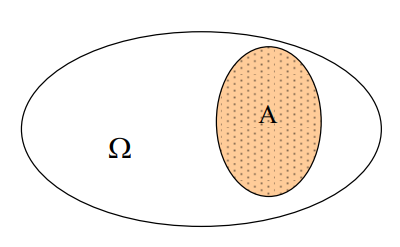

Если считать, что попадание в любую точку области $W$
равновозможно, то вероятность попадания случайной точки в заданное множество $A$ будет равна отношению площадей
$$
P(A) = \frac{S(A)}{S(Ω)}
$$

Где $P$ - вероятность, а $S$ - площадь. Т.е. по сути вероятность равна площади благоприятной области к площади всей области  площадь благоприятной области.

По нашей задаче, у нас трехмерное пространство, т.е. вместо площадей будет объем:

$$
P(A) = \frac{V(A)}{V(Ω)}
$$

Где, $V(Ω)$ - объем единичного куба, $V(A)$ - объем нужно области.

In [ ]:
import numpy as np
from scipy.integrate import nquad

def integrand(x, y, z):
    def dist_to_nearest_vertex(x, y, z):
        return min(np.sqrt(x**2 + y**2 + z**2),
                   np.sqrt((1 - x)**2 + y**2 + z**2),
                   np.sqrt(x**2 + (1 - y)**2 + z**2),
                   np.sqrt(x**2 + y**2 + (1 - z)**2),
                   np.sqrt((1 - x)**2 + (1 - y)**2 + z**2),
                   np.sqrt((1 - x)**2 + y**2 + (1 - z)**2),
                   np.sqrt(x**2 + (1 - y)**2 + (1 - z)**2),
                   np.sqrt((1 - x)**2 + (1 - y)**2 + (1 - z)**2))
    return 1 if dist_to_nearest_vertex(x, y, z) > 0.75 else 0

def volume_above_distance():
    return nquad(integrand, [[0, 1], [0, 1], [0, 1]])[0]

# Вычислить объем
volume = volume_above_distance()
print(f"Volume: {volume:.6f}")

/usr/local/lib/python3.10/dist-packages/scipy/integrate/_quadpack_py.py:1272: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


KeyboardInterrupt: 

По сути благоприятная область, это светло голубая область выше внутреннего куба, но меньше единичного куба.

In [ ]:
import numpy as np

def monte_carlo_probability(num_samples=1000000):
    count_inside = 0
    points = np.random.rand(num_samples, 3)

    for point in points:
        x, y, z = point
        min_dist = min(np.sqrt(x**2 + y**2 + z**2),
                       np.sqrt((1 - x)**2 + y**2 + z**2),
                       np.sqrt(x**2 + (1 - y)**2 + z**2),
                       np.sqrt(x**2 + y**2 + (1 - z)**2),
                       np.sqrt((1 - x)**2 + (1 - y)**2 + z**2),
                       np.sqrt((1 - x)**2 + y**2 + (1 - z)**2),
                       np.sqrt(x**2 + (1 - y)**2 + (1 - z)**2),
                       np.sqrt((1 - x)**2 + (1 - y)**2 + (1 - z)**2))

        if min_dist > 0.75:
            count_inside += 1

    probability = count_inside / num_samples
    return round(probability, 6)

probability = monte_carlo_probability()
print(f"{probability:.6f}")

0.012505


In [ ]:
num_samples = 2
points = np.random.rand(num_samples, 3)
points

array([[0.42026924, 0.76701419, 0.91855903],
       [0.60368059, 0.41160624, 0.82460222]])

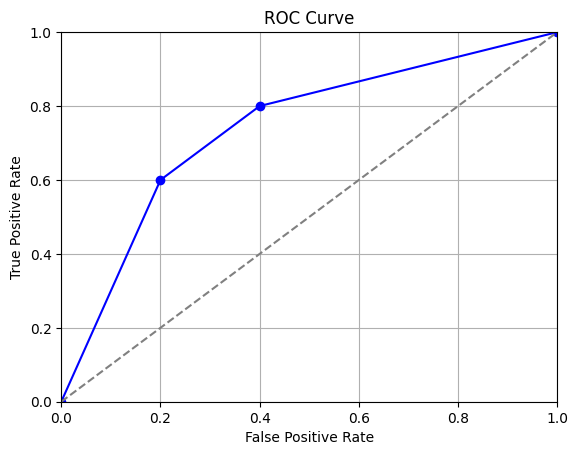

In [ ]:
import matplotlib.pyplot as plt

# Данные экспериментов
fpr_experiment1 = 0.4
tpr_experiment1 = 0.8
fpr_experiment2 = 0.2
tpr_experiment2 = 0.6

# Создание точек ROC-кривой
fpr = [0, fpr_experiment2, fpr_experiment1, 1]
tpr = [0, tpr_experiment2, tpr_experiment1, 1]

# Построение ROC-кривой
plt.figure()
plt.plot(fpr, tpr, marker='o', linestyle='-', color='b')

# Добавление линий для диагонали
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

# Настройка графика
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)

plt.show()

лассификатор Антиголубь должен отличать котов от голубей, чтобы Мария Владимировна из задачи "Найди кота!" была спокойна, что корм для кошек не крадут голуби. Для этой задачи стажёр Тимур привлёк Кирилла, своего друга, с которым он познакомился на стажировке. Тимур и Кирилл написали классификаторы для потока, про который известно, что голубей там ровно половина.

Классификатор Тимура опознаёт 80% голубей из всех голубей, но находит (ошибочно) 40% голубей среди всех котов. Классификатор Кирилла опознаёт 60% голубей из всех голубей, но считает голубем 20% котов.

Если предположить, что они написали один и тот же классификатор, определяющий посещения кормушки голубями, в пределах от 0 до 1, но выбрали различный порог срабатывания, какая у этого классификатора может быть максимальная f-мера?

Pressision = 0.60771904, So Recall = 0.941474, So F1(max) = 2*0.60771904*0.941474/(0.60771904 + 0.941474)

In [ ]:
from numpy import linspace

def F(x, y):
    if x + y == 0:
        return float('-inf')  # Avoid division by zero
    return 2 * x * y / (x + y)

max_value = float('-inf')
max_x = 0

size = 10_000
left = 0
right = 1

for epoch in range(10):
    x_values = linspace(left, right, size)

    for x in x_values:
        y = -12 * x / 5 + 12 / 5
        current_value = F(x, y)
        if current_value > max_value:
            max_value = current_value
            max_x = x

    # Update the search range centered around max_x
    range_width = (right - left) / 3
    left = max(0, max_x - range_width)
    right = min(1, max_x + range_width)
    # print(f"Epoch {epoch+1}: left = {left}, max_x = {max_x}, right = {right}, max_value = {max_value}")

print(f"Maximum value of F = {max_value} at x = {max_x}")
print("Rounded:", round(max_value, 6))

Maximum value of F = 0.7386448727353314 at x = 0.6077196552658366
Rounded: 0.738645


# 566. Пушистики ✅

Ветеринарные клиники способны за короткий промежуток времени принять очень большое количество хвостатых посетителей, но к сожалению, количество мест остается ограниченным.

У ветеринара есть медкарты $N$ питомцев, для каждого питомца известно время, которое потребуется на процедуры. У ветеринара смена длиться $t$ времени.

И, естественно, он хочет помочь как можно большему числу пушистиков. Для того, чтобы придумать оптимальный режим работы, нужно много анализировать. И первое, что заинтересовало ветеринара - какое максимальное количество питомцев смогут получить помощь, если он будет работать оптимально. Так как животных много, и ветеринару некогда заниматься этими расчётами, он попросил вас помочь с этим.

**Формат ввода**

В первой строке содержится два целых числа $n(1<=10^5)$ и $t(
1≤10^{18})$.

Во второй строке содержится ровно $n$ целых чисел $a_i (1≤10^{18})$.

**Формат вывода**

В единственной строке выведите одно целое число, обозначающее максимальное количество пушистых пациентов, которых может взять ветеринар.

In [ ]:
# n - число питомцев
# t - длительность смены врача
n, t = list(map(int, input().split()))

# время на каждого питомца
a = list(map(int, input().split()))
# 4 8
# 5 10 3 2
# Ответ: 2

# 4 1
# 2 3 5 4
# Ответ: 0

In [ ]:
def max_pets(n, t, times):
    # Сортируем массив времен
    times.sort()

    # Инициализируем переменные
    total_time = 0
    count = 0

    # Проходим по отсортированному массиву
    for time in times:
        if total_time + time <= t:
            total_time += time
            count += 1
        else:
            break  # Как только время превышает t, прекращаем подсчет

    return count

# Чтение входных данных
n, t = map(int, input().split())
times = list(map(int, input().split()))

# Получение результата
result = max_pets(n, t, times)

# Вывод результата
print(result)

4 1
2 3 5 4
0


# 567. Найди кота! ✅

У стажёра Тимура есть любимая бабуля Мария Владимировна. Баба Маня регулярно подкармливает кошек возле своего дома. Тимур не просто стажёр, а стажёр-разработчик! Поэтому он решил автоматизировать пополнение миски с кормом. Для этого Тимур поставил камеру и при помощи алгоритмов компьютерного зрения научился выделять кошек на фото (чтобы всю еду не склевали голуби).

Фото котов:

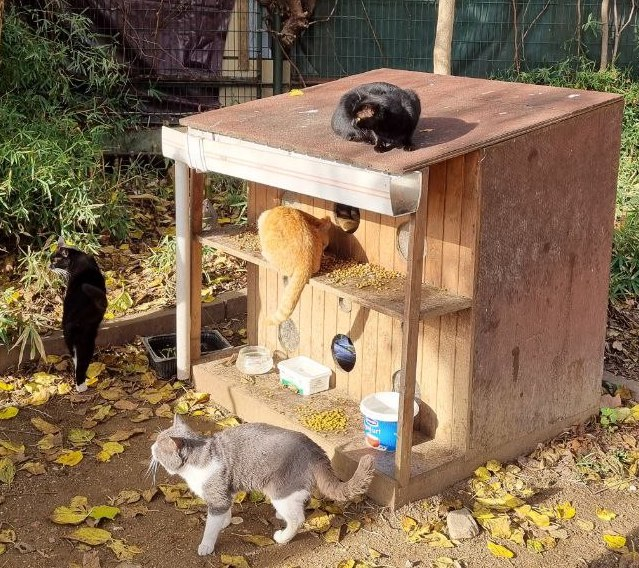

Выделенные с помощью алгоритмов компьютерного зрения коты:

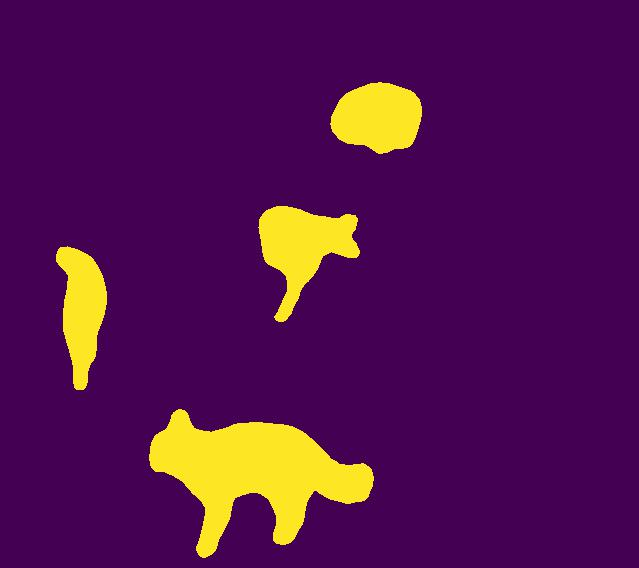

Баба Маня справедливо подсказала Тимуру, что надо бы не просто знать, что кошки пришли поесть к миске, но и посчитать их количество и насыпать необходимое количество порций корма. А сестра Тимура предложила сделать аккаунт с фото кошек, чтобы найти им хозяев. Для этого нужно не просто посчитать кошек на фото, но и научиться разделять кошек между собой, имея выделенные области со всеми кошками, например, вот так:

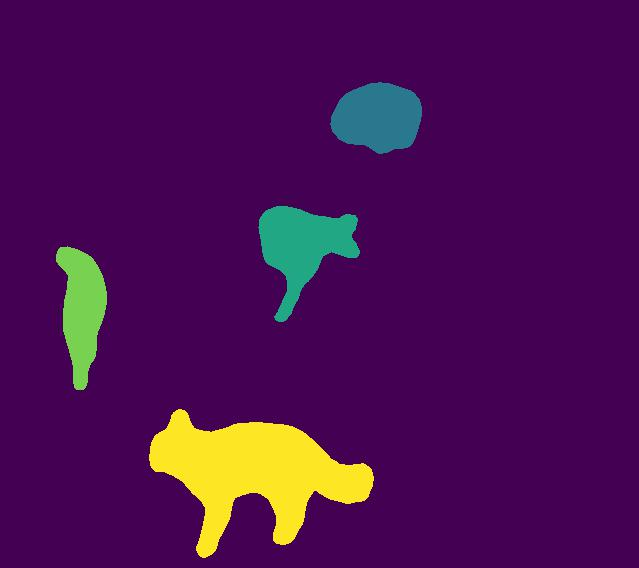

Кошки, которые приходят поесть из миски, ведут себя очень воспитанно и соблюдают социальную кошачью дистанцию. Поэтому гарантируется, что кошки на фотографии не соседствуют по горизонтальным или вертикальным пикселям. Но разные кошки могут находиться в соседних пикселях друг с другом по диагонали.

Помогите Тимуру и бабе Мане посчитать кошек и найти каждую из них на результатах уже имеющегося алгоритма!

**Формат ввода**

На вход подается результат первичной сегментации: $M$ строк, в каждой из них $N$ целых чисел ($0$ обозначает фон, $1$ − области, где алгоритм нашел кошку). $1≤N,M≤500$.

**Формат вывода**

В первой строке выведите число уникальных найденных на сегментации объектов.

Далее выведите матрицу размера $N×M$ (как и входная матрица) с разметкой общих сегментированных областей на отдельные объекты (у каждого объекта должен быть свой уникальный номер).

Пример 1

Ввод:

```
1 0 1
0 0 0
0 1 0
```
Вывод:

`3`

```
1 0 2
0 0 0
0 3 0
```

In [ ]:
import numpy as np
import sys

# Чтение всех данных из стандартного ввода
input_data = sys.stdin.read().strip()

# Разделение данных на строки и затем на элементы
lines = input_data.split('\n')
matrix = [list(map(int, line.split())) for line in lines]

# Преобразование списка списков в numpy.array
matrix = np.array(matrix)

In [ ]:
# -*- encoding: utf-8 -*-

import numpy as np
import sys

def helper(grid, rows, cols, i, j):
    if i < 0 or i >= rows or j < 0 or j >= cols or grid[i][j] == '0':
        return

    grid[i][j] = '0'
    helper(grid, rows, cols, i + 1, j)
    helper(grid, rows, cols, i - 1, j)
    helper(grid, rows, cols, i, j - 1)
    helper(grid, rows, cols, i, j + 1)

def numIslands(grid):
    rows = len(grid)
    cols = len(grid[0])
    num_of_lands = 0
    for i in range(rows):
        for j in range(cols):
            if grid[i][j] == '1':
                num_of_lands += 1
                helper(grid, rows, cols, i, j)
    return num_of_lands

# Чтение всех данных из стандартного ввода
input_data = sys.stdin.read().strip()

# Разделение данных на строки и затем на элементы
lines = input_data.split('\n')
grid = [list(line.split()) for line in lines]

# Преобразование списка списков в numpy.array
grid = np.array(grid)

print(numIslands(grid))

0


In [ ]:
# -*- encoding: utf-8 -*-

import sys

# это функция которая просто преобразует результат фукнции numCats() в нужный вид
# потому что numCats() возвращает id кота и координаты его пикселей в виде словаря
def create_matrix_from_dict(data_dict, rows, cols):
    # Создаем пустую матрицу заданного размера
    matrix = [[0] * cols for _ in range(rows)]

    # Заполняем матрицу значениями из словаря
    for value, coordinates in data_dict.items():
        for (r, c) in coordinates:
            matrix[r][c] = value

    return matrix

# функция подсчета котов и создание их карты по id
def numCats(grid):
    CAT = '1'
    BACKGROUND = '0'
    rows = len(grid)
    cols = len(grid[0])

    current_cat_id = 0 # id текущего кода
    visited = set() # все точки чтобы сохранить какие уже посетили
    cats = {} # сюда будем сохранять id и координаты котов

    st = []

    for ri in range(rows):
        for ci in range(cols):
            if grid[ri][ci] == CAT and not (ri,ci) in visited:
                # новый кот
                current_cat_id += 1
                cats[current_cat_id] = set()
                st.append((ri,ci))
            else:
                # старый кот или фон
                visited.add((ri,ci))

            while st:
                r, c = st.pop()
                if (r,c) in visited:
                    continue

                visited.add((r,c))
                if grid[r][c] == BACKGROUND:
                    continue

                cats[current_cat_id].add((r,c))

                if r > 0:
                    st.append((r-1,c))
                if r < rows-1:
                    st.append((r+1,c))
                if c > 0:
                    st.append((r,c-1))
                if c < cols-1:
                    st.append((r,c+1))

    # Создаем матрицу из словаря
    result_matrix = create_matrix_from_dict(cats, rows, cols)

    return current_cat_id, result_matrix

# Чтение всех данных из стандартного ввода
input_data = sys.stdin.read().strip()

# Разделение данных на строки и затем на элементы
lines = input_data.split('\n')
grid = [list(line.split()) for line in lines]

n,  result_matrix = numCats(grid)

# Выводим результат
print(n)
for row in result_matrix:
    print(" ".join(map(str, row)))

3
1 0 2
0 0 0
0 3 0


# 568. Наименьший вещественный корень ✅

Лена всю ночь готовилась к зачёту по линалу. Но сон оказался сильнее. Во сне Лена боролась с чайками в комплексной плоскости. Со своим главным врагом - $𝑒^{−iϕ}$ она боролась, извлекая корни из полинома и бросая их в него.

Внезапно полином поднялся вверх на сферу Римана, и вернулся в виде матричного уравнения $det(A−zI)=0$.

-Это легкотня, к этому я готова, - подумала Лена.

В эту же секунду полином совершил еще одну метаморфозу. Перед Леной возникло уравнение $det(B+Az+Iz^2)=0$.

-Этого не было в учебнике, так не честно,- с ужасом прокричала Лена. Зачётка полетела вдаль от Лены…

С колотящимся сердцем она проснулась и начала думать, как найти корни такого полинома. В ходе своих размышлений, Лена поняла, что для победы над $𝑒^{−iϕ}$ ей бы хватило и наименьшего вещественного корня этого уравнения, так как Лена запомнила, что её главный враг принялся убегать в направлении минус бесконечности на вещественной оси.

Ваша задача помочь Лене найти наименьший вещественный корень уравнения $det(B+Az+Iz^2)=0$, где матрицы $A$ и $B$ - вещественные симметричные матрицы. Гарантируется, что такой корень существует.

**Формат ввода**

Первая строка содержит число $n (1≤n≤100)$ - размер матриц $A$ и $B$.

В следующих $n$ строчках содержится $n$ вещественных чисел $A_{i,j} (-1 <= A_{i,j} <= 7$ - элементы матрицы $A$.

В следующих $n$ строчках содержится $n$ вещественных чисел $B_{i,j} (-1 <= B_{i,j} <= 7$ - элементы матрицы $A$.

Каждая строка с элементами матриц $А$ и $B$ заканчивается пробелом после последнего элемента и переводом строки.

**Формат вывода**

Выведите одно число - ответ на задачу с точностью четыре знака после запятой. Округление выполняется по стандартным правилам. Рекомендуем использовать `np.round(data, 4)` или аналоги.

In [ ]:
import numpy as np
from scipy.optimize import root_scalar

# Определение матриц A и B
# A = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])  # Пример симметричной матрицы A
# B = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])  # Пример симметричной матрицы B
# I = np.eye(3)  # Единичная матрица

# 3
# 1 0 0
# 0 1 0
# 0 0 1
# -1 0 0
# 0 -1 0
# 0 0 -1


def determinant_function(z):
    """
    Функция для вычисления детерминанта B + Az + I z^2
    """
    matrix = B + A * z + I * z**2
    return np.linalg.det(matrix)

def find_smallest_root():
    """
    Находит наименьший вещественный корень уравнения det(B + Az + I z^2) = 0
    """
    # Используем np.linspace для создания интервала проверки
    z_values = np.linspace(-10, 10, 100)

    # Вычисляем значения детерминанта на этом интервале
    det_values = np.array([determinant_function(z) for z in z_values])

    # Найти интервалы, где детерминант меняет знак
    intervals = []
    for i in range(len(z_values) - 1):
        if det_values[i] * det_values[i + 1] < 0:
            intervals.append((z_values[i], z_values[i + 1]))

    if not intervals:
        raise ValueError("Не удалось найти интервалы, где функция меняет знак.")

    # Найти корень в каждом интервале и выбрать наименьший
    smallest_root = None
    for interval in intervals:
        try:
            result = root_scalar(determinant_function, bracket=interval, method='brentq')
            if smallest_root is None or result.root < smallest_root:
                smallest_root = result.root
        except ValueError:
            # Если метод не смог найти корень, пропустите этот интервал
            continue

    if smallest_root is None:
        raise ValueError("Не удалось найти вещественный корень.")

    return smallest_root

# Входные данные
n = int(input())
A = np.zeros((n, n))
for i in range(n):
    A[i] = [float(x) for x in input().split()]
B = np.zeros((n, n))
for i in range(n):
    B[i] = [float(x) for x in input().split()]

# Найти наименьший корень
smallest_root = find_smallest_root()
print(np.round(smallest_root,4))

3
1 0 0
0 1 0
0 0 1
-1 0 0
0 -1 0
0 0 -1
-1.618


In [ ]:
import numpy as np
from scipy.optimize import brentq

# Входные данные
n = int(input())
A = np.zeros((n, n))
for i in range(n):
    A[i] = [float(x) for x in input().split()]
B = np.zeros((n, n))
for i in range(n):
    B[i] = [float(x) for x in input().split()]

# Функция для вычисления определителя матрицы в зависимости от z
def det_z(z):
    return np.linalg.det(B + A * z + np.eye(n) * z**2)

# Поиск корня уравнения det(B + Az + Iz^2) = 0
# Используем метод Brent's method для поиска корней в диапазоне

# Определяем диапазон для поиска корня
z_min, z_max = -10**10, 10**10  # Это примерный диапазон, его можно корректировать

try:
    root = brentq(det_z, z_min, z_max)
    root_rounded = round(root, 4)
    print(root_rounded)
except ValueError as e:
    print("Корень не найден в заданном диапазоне:", e)

# 3
# 1 0 0
# 0 1 0
# 0 0 1
# -1 0 0
# 0 -1 0
# 0 0 -1

# -1.618

3
1 0 0
0 1 0
0 0 1
-1 0 0
0 -1 0
0 0 -1
Корень не найден в заданном диапазоне: f(a) and f(b) must have different signs


In [ ]:
# зашло
from scipy.optimize import fsolve
import numpy as np

def f(z):
    return np.linalg.det(B + A * z + I * z**2)

# n = 3
# A = [[1,0,0],
#      [0,1,0],
#      [0,0,1]]

# B = [[-1,0,0],
#      [0,-1,0],
#      [0,0,-1]]
n = int(input())
A = np.zeros((n, n))
for i in range(n):
    A[i] = [float(x) for x in input().split()]
B = np.zeros((n, n))
for i in range(n):
    B[i] = [float(x) for x in input().split()]

I = np.eye(n)

min_root = 1000

for x0 in np.linspace(-10, 10, 10):
    z = fsolve(f, x0)[0]
    if z <= min_root:
        min_root = z

print(np.round(min_root, 4))

-1.618


<ipython-input-10-516a37a7c4ab>:20: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  z = fsolve(f, x0)[0]


In [ ]:
np.linspace(-10, 10, 10)

array([-10.        ,  -7.77777778,  -5.55555556,  -3.33333333,
        -1.11111111,   1.11111111,   3.33333333,   5.55555556,
         7.77777778,  10.        ])

In [ ]:
import numpy as np
from scipy.optimize import minimize_scalar

# Входные данные
n = int(input())
A = np.zeros((n, n))
for i in range(n):
    A[i] = [float(x) for x in input().split()]
B = np.zeros((n, n))
for i in range(n):
    B[i] = [float(x) for x in input().split()]

def det_z(z):
    return np.linalg.det(B + A * z + np.eye(n) * z**2)

res = minimize_scalar(lambda z: abs(det_z(z)), bounds=(-10, 10), method='bounded')

root = res.x
root_rounded = round(root, 4)

print(root_rounded)
# 3
# 1 0 0
# 0 1 0
# 0 0 1
# -1 0 0
# 0 -1 0
# 0 0 -1

3
1 0 0
0 1 0
0 0 1
-1 0 0
0 -1 0
0 0 -1
-1.618


# 572. Поход в горы

Что может быть лучше похода в горы?

Группа друзей из Томского государственного университета обнаружили рекламу восхождения на Пик Томских студентов – это вершина высотой **$3500$** метров на Алтае.

Восхождение на Пик занимает около **двух дней**, поэтому друзья решили забронировать место в хостеле Снежинка в **$500$** метрах от вершины, чтобы немного передохнуть.

Придя в хостел, группа увидела очень грустного владельца, который глядел в стену. Но наша группа не простая, а с факультета ПМИ! Поэтому после расспросов, студенты выяснили в чём проблема и немедленно сели её решать.

Хостел совсем небольшой, одновременно в нем может находиться не более $s$ человек. На ближайший период поступило $n$ заявок, $i$-ый турист сообщил, что прибудет в приют во время $t_i$.

Теперь в хостеле необходимо ввести ограничение на время пребывания одного туриста в хостеле таким образом, чтобы одновременно в приюте находилось не более $s$ человек.

Ограничение на максимальное время пребывания в хостеле одинаково для всех туристов.

**Формат ввода**

В первой строке содержится два целых числа $N, S (1 ≤ n, s ≤ 2⋅10^5)$ – количество заявок от туристов и вместимость хостела соответственно. В следующих n строках содержится по одному целому числу $t_i (0 ≤ ti ≤ 2⋅10^9)$ – время прибытия $i$-го туриста.

**Формат вывода**

Выведите одно положительное число – максимальное время, которое каждый турист может провести в хостеле. Выведите $Impossible$, если хостел окажется переполнен при любом положительном времени пребывания. В случае, если в установке ограничения времени нет необходимости, выведите $INF$.

In [ ]:
N, S = list(map(int, input().split()))

t = []
for i in range(N):
    t.append(int(input()))

# Ввод
# 8 3
# 3
# 6
# 4
# 5
# 0
# 2
# 7
# 0

8 3
3
6
4
5
0
2
7
0


In [ ]:
def max_stay_time(n, s, arrivals):
    arrivals.sort()

    def can_stay(t):
        current_visitors = 0
        left = 0
        for right in range(n):
            while arrivals[right] - arrivals[left] + 1 > t:
                left += 1
            current_visitors = max(current_visitors, right - left + 1)
            if current_visitors > s:
                return False
        return True

    left, right = 1, max(arrivals) - min(arrivals) + 1
    while left < right:
        mid = (left + right) // 2
        if can_stay(mid):
            left = mid + 1
        else:
            right = mid

    result = left - 1

    if result == 0:
        return "Impossible"
    elif result == max(arrivals) - min(arrivals) + 1:
        return "INF"
    else:
        return result

# # Ввод
N, S = 5, 100
t = [98, 123, 42, 1840, 999999997]

# 5 100
# 98
# 123
# 42
# 1840
# 999999997

# Вывод результата
print(max_stay_time(N, S, t))

999999955


In [ ]:
def is_possible(t, max_time, s):
    current_guests = 0
    leave_times = []

    for arrival in t:
        print(f'arrival in loop: {arrival}')
        # Удаляем гостей, которые уже должны были уйти
        leave_times = [lt for lt in leave_times if lt > arrival]
        print('Удаляем гостей, которые уже должны были уйти:', leave_times)

        # Добавляем текущего гостя с его временем отъезда
        leave_times.append(arrival + max_time)
        print('Добавляем текущего гостя с его временем отъезда:', leave_times)

        # Проверяем, не превысили ли мы вместимость хостела
        if len(leave_times) > s:
            return False

    return True

def max_stay_time(n, s, times):
    left = 0
    right = max(times)
    result = "Impossible"

    while left <= right:
        print(f'Left: {left}, Mid: {(left + right) // 2}, Right: {right}')
        mid = (left + right) // 2
        if is_possible(times, mid, s):
            result = mid
            left = mid + 1
        else:
            right = mid - 1
        print('-'*20)

    # Проверяем возможность бесконечного времени пребывания
    if is_possible(times, float('inf'), s):
        return "INF"

    return result

# Пример ввода данных
n = 5
s = 100
times = [98, 123, 42, 1840, 999999997]

print(max_stay_time(n, s, times))

Left: 0, Mid: 499999998, Right: 999999997
arrival in loop: 98
Удаляем гостей, которые уже должны были уйти: []
Добавляем текущего гостя с его временем отъезда: [500000096]
arrival in loop: 123
Удаляем гостей, которые уже должны были уйти: [500000096]
Добавляем текущего гостя с его временем отъезда: [500000096, 500000121]
arrival in loop: 42
Удаляем гостей, которые уже должны были уйти: [500000096, 500000121]
Добавляем текущего гостя с его временем отъезда: [500000096, 500000121, 500000040]
arrival in loop: 1840
Удаляем гостей, которые уже должны были уйти: [500000096, 500000121, 500000040]
Добавляем текущего гостя с его временем отъезда: [500000096, 500000121, 500000040, 500001838]
arrival in loop: 999999997
Удаляем гостей, которые уже должны были уйти: []
Добавляем текущего гостя с его временем отъезда: [1499999995]
--------------------
Left: 499999999, Mid: 749999998, Right: 999999997
arrival in loop: 98
Удаляем гостей, которые уже должны были уйти: []
Добавляем текущего гостя с его 

Метод скользящего окна для поиска интервала времени, в котором количество туристов превышает $𝑆$. Поддерживается два указателя, $left$ и $right$, которые обозначают границы текущего окна времени.

- Перемещаем указатель $right$, увеличивая количество гостей в окне.
- Когда количество гостей в окне становится больше $S$, обновляем минимальное время, на которое необходимо ограничить пребывание, чтобы количество гостей не превышало $S$. Затем перемещаем указатель $left$ для поиска нового интервала.

In [ ]:
N, S = map(int, input().split())
guests = []

for i in range(N):
    guests.append(int(input()))
# 5 100
# 98
# 123
# 42
# 1840
# 999999997

# 8 3
# 3
# 6
# 4
# 5
# 0
# 2
# 7
# 0
# N, S = 5, 100
# guests = [98, 123, 42, 1840, 999999997]
guests.sort()

if N <= S:
    print("INF")
else:
    diff = float('inf')
    left = 0
    current_guests = 0
    for right in range(N):
        current_guests += 1
        if current_guests == S + 1:
            diff = min(diff, guests[right] - guests[left])
            prev_guest = guests[left]
            while (guests[left] == prev_guest) and (left<right):
                left += 1
                current_guests -= 1
    if diff <= 0:
        print("Impossible")
    else:
        print(diff)

INF


# 573. Антиголубь

Классификатор Антиголубь должен отличать котов от голубей, чтобы Мария Владимировна из задачи ”Найди кота!” была спокойна, что корм для кошек не крадут голуби.

Для этой задачи стажёр Тимур привлёк Кирилла, своего друга, с которым он познакомился на стажировке.

Тимур и Кирилл написали классификаторы для потока, про который известно, что голубей там ровно половина. Классификатор Тимура опознаёт $80\%$ голубей из всех голубей, но находит (ошибочно) $40\%$ голубей среди всех котов. Классификатор Кирилла опознаёт $60\%$ голубей из всех голубей, но считает голубем $20\%$ котов.

Если предположить, что они написали один и тот же классификатор, определяющий посещения кормушки голубями, в пределах от $0$ до $1$, но выбрали различный порог срабатывания, какая у этого классификатора может быть максимальная $f-мера$?

**Формат вывода**

Если ответ не является целым числом, запишите его в виде десятичной дроби. Если значимых цифр после запятой больше шести, округлите ответ до 6 знаков после запятой или точки (формат (-)N,NNNNNN или (-)N.NNNNNN), используя округление до ближайшего (например: 0,1234565 следует округлить до 0,123457). Если десятичная запись с 6 знаками заканчивается нулями, то их можно опустить (например: 0,123 можно представить либо 0,123, либо 0,1230, либо 0,12300, либо 0,123000).

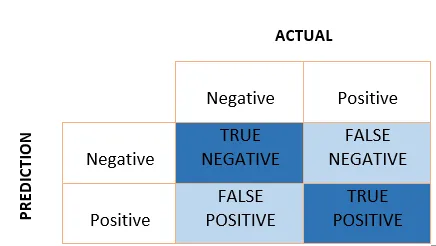

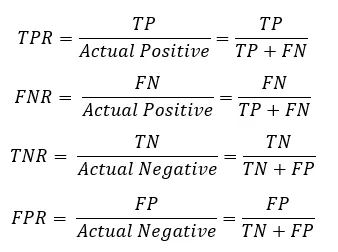

Для Тимура:

- $TPR = 0.8$
- $FPR = 0.4$

Для Кирилла:

- $TPR = 0.6$
- $FPR = 0.2$

$\frac{FP}{TN+FP} = \frac{8}{10}$

$\frac{TP}{TP+FN} = \frac{4}{10}$

$FP+TN = TP+FN$

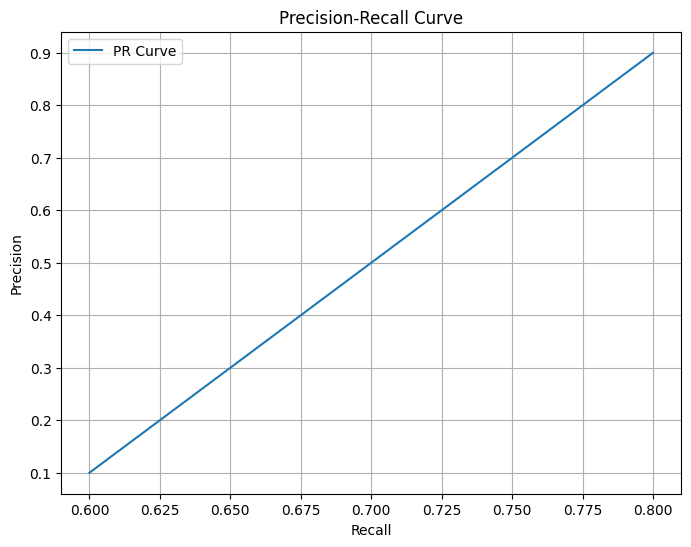

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Пример данных (TPR и FPR для двух порогов)
tpr_points = [0.8, 0.6]
fpr_points = [0.4, 0.2]

# Предполагаем, что данные сбалансированы (например, количество положительных и отрицательных классов одинаково)
# Количество истинных положительных и ложных положительных
# Эти значения можно приблизительно рассчитать или принять как гипотетические

# Поставим, что precision и recall можно приблизительно рассчитать для интерполяции
recalls = np.linspace(min(tpr_points), max(tpr_points), num=100)
precisions = np.linspace(0.1, 0.9, num=100)  # Здесь нужно применять реальные данные, если они известны

# Построение PR кривой
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='PR Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
import numpy as np

def f_measure(precision, recall):
    if precision + recall == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

def find_max_f_measure(p_t, f_p_t, p_k, f_p_k):
    # Точность и полнота для классификатора Тимура
    precision_t = p_t
    recall_t = 1 - f_p_t

    # Точность и полнота для классификатора Кирилла
    precision_k = p_k
    recall_k = 1 - f_p_k

    # Максимизация F-меры
    f_t = f_measure(precision_t, recall_t)
    f_k = f_measure(precision_k, recall_k)

    return max(f_t, f_k)

# Входные данные
p_t = 0.8  # точность Тимура
f_p_t = 0.4  # ложноположительные Тимура
p_k = 0.6  # точность Кирилла
f_p_k = 0.2  # ложноположительные Кирилла

# Нахождение максимальной F-меры
max_f = find_max_f_measure(p_t, f_p_t, p_k, f_p_k)

# Вывод с округлением до 6 знаков после запятой
print(f"{max_f:.6f}")

0.685714


In [ ]:
def calculate_f_measure(tpr, fpr):
    precision = tpr / (tpr + fpr)
    recall = tpr
    f_measure = 2 * (precision * recall) / (precision + recall)
    return f_measure

# Показатели классификаторов
classifiers = [
    {'tpr': 0.8, 'fpr': 0.4},  # Тимур
    {'tpr': 0.6, 'fpr': 0.2}   # Кирилл
]

# Вычисляем F-меру для каждого классификатора
max_f_measure = 0
for classifier in classifiers:
    tpr = classifier['tpr']
    fpr = classifier['fpr']
    f_measure = calculate_f_measure(tpr, fpr)
    if f_measure > max_f_measure:
        max_f_measure = f_measure

print(f"{max_f_measure:.6f}")

0.727273


In [ ]:
from numpy import linspace

def F(x, y):
    if x + y == 0:
        return float('-inf')  # Avoid division by zero
    return 2 * x * y / (x + y)

max_value = float('-inf')
max_x = 0

size = 10_000
left = 0
right = 1

for epoch in range(10):
    x_values = linspace(left, right, size)

    for x in x_values:
        y = -12 * x / 5 + 12 / 5
        current_value = F(x, y)
        if current_value > max_value:
            max_value = current_value
            max_x = x

    # Update the search range centered around max_x
    range_width = (right - left) / 3
    left = max(0, max_x - range_width)
    right = min(1, max_x + range_width)
    # print(f"Epoch {epoch+1}: left = {left}, max_x = {max_x}, right = {right}, max_value = {max_value}")

print(f"Maximum value of F = {max_value} at x = {max_x}")
print("Rounded:", round(max_value, 6))

Maximum value of F = 0.7386448727353314 at x = 0.6077196552658366
Rounded: 0.738645


In [ ]:
t = 2*0.60771904*0.941474/(0.60771904 + 0.941474)
round(t, 6)

0.738645

# 574. Лето у бабушки

В прекрасную солнечную Кубань приехали на лето к бабушке брат и сестра Пафнутий и Алевтина. Пафнутий и Алевтина каждый день летних каникул играли с кубиками и больше всего им понравилась следующая игра:

Есть два игрока, игроки по очереди бросают по одному $k$-гранному кубику, пока число выпавших кубиков не будет равно $m$. Когда выпало $m$ кубиков, игроки перемножают выпавшие на кубиках числа и считают количество делителей и у получившегося числа.

Если это число имеет нечетное число делителей, то победил первый игрок. В обратном случае побеждает второй игрок.

Пафнутий начинает первым. А Пафнутий очень любознательный мальчик, поэтому он просит вас ответить ему на один единственный вопрос: **какая вероятность его победы, если все кубики бросаются независимо?**

Можно показать, что ответ может быть представлен в виде несократимой дроби $\frac{q}{p}$, где $p$ и $q$ ~--- целые числа, и $q \not\equiv{0}$ $(\mod1000000007)$. Выведите целое число, равное $p⋅q^{−1} \mod 1000000007$.

Другими словами, выведите такое целое число $x$, что $0≤x<1000000007$ и $x⋅q≡p(\mod1000000007)$.

**Формат ввода**

В первой и единственной строке находятся два целых числа − число кубиков $1≤m≤1000$, число граней каждого кубика $3≤k≤20$.

**Формат вывода**

Выведите одно целое число − значение $p⋅q^{−1} \mod 1000000007$.

**Примечание**

Кубик называется $k$ гранным если на его гранях записаны цифры от $1$ до $k$ и все они могут равновероятно выпасть на кубике.

In [ ]:
m, k = map(int, input().strip().split())

grani = []
for i in range(m):
    grani.append([i+1 for i in range(k)])

grani

5 5


[[1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5],
 [1, 2, 3, 4, 5]]

In [ ]:
m = 3
k = 3
faces = [i + 1 for i in range(k)]
print(faces)
print('-'*10)
# Generate all possible outcomes for m dice
combinations = itertools.product(faces, repeat=m)
list(combinations)

[1, 2, 3]
----------


[(1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 2, 1),
 (2, 2, 2),
 (2, 2, 3),
 (2, 3, 1),
 (2, 3, 2),
 (2, 3, 3),
 (3, 1, 1),
 (3, 1, 2),
 (3, 1, 3),
 (3, 2, 1),
 (3, 2, 2),
 (3, 2, 3),
 (3, 3, 1),
 (3, 3, 2),
 (3, 3, 3)]

In [ ]:
import math

def find_divisors(n):
    divisors = []
    for i in range(1, int(math.sqrt(n))+1):
        if n % i == 0:
            divisors.append(i)
            if i != n // i:
                divisors.append(n // i)
    return divisors

In [ ]:
import itertools
import numpy as np
m = 5
k = 5
grani = [i + 1 for i in range(k)]
combinations = list(itertools.product(grani, repeat=m))

k = 0
for i in combinations:
    product = np.prod(i)
    divisors_num = len(find_divisors(product))
    # print(i, product, divisors_num)
    if divisors_num%2 != 0:
        k += 1

print(k)
len(combinations)

482


3125

3125


In [ ]:
import math

k = 4  # количество элементов в каждой последовательности
m = 3  # количество последовательностей

# Количество комбинаций, если все последовательности имеют k элементов
total_combinations = pow(k, m)
print(total_combinations)

# Или для разных значений k
ks = [2, 3, 5]  # разные количества элементов в последовательностях
total_combinations_different = math.prod(ks)
print(total_combinations_different)

In [ ]:
def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    result = (p * q_inv) % mod
    return result

p = 482
q = 3125
mod = 1000000007

# Вычисление результата
result = compute_result(p, q, mod)
print(result)

263680002


In [ ]:
import math
import itertools
import numpy as np

def find_divisors(n):
    divisors = []
    for i in range(1, int(math.sqrt(n))+1):
        if n % i == 0:
            divisors.append(i)
            if i != n // i:
                divisors.append(n // i)
    return divisors

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    result = (p * q_inv) % mod
    return result

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    result = (p * q_inv) % mod
    return result

m, k = map(int, input().strip().split())
grani = [i + 1 for i in range(k)]

k = 0
for i in itertools.product(grani, repeat=m):
    product = np.prod(i)
    divisors_num = len(find_divisors(product))
    if divisors_num%2 != 0:
        k += 1

p = k
q = len(combinations)
mod = 1000000007

# Вычисление результата
result = compute_result(p, q, mod)
print(result)

5 5
263680002


In [ ]:
import math
import itertools
import numpy as np

def count_divisors(n):
    count = 0
    for i in range(1, int(math.sqrt(n)) + 1):
        if n % i == 0:
            count += 1
            if i != n // i:
                count += 1
    return count

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    result = (p * q_inv) % mod
    return result

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    result = (p * q_inv) % mod
    return result

m, k = map(int, input().strip().split())

# Количество всех возможных комбинаций,
# по сути количество чисел для которых нужно найти делители, т.е. q
q = pow(k, m)
grani = [i + 1 for i in range(k)]

p = 0
for i in itertools.product(grani, repeat=m):
    product = np.prod(i)
    if count_divisors(product) % 2 != 0:
        p += 1

mod = 1000000007

# Вычисление результата
print(compute_result(p, q, mod))

5 5
263680002


In [ ]:
import itertools
import math
from collections import Counter
from functools import reduce
from operator import mul

MOD = 1000000007

def is_square(n):
    if n < 1:
        return False
    root = int(math.isqrt(n))
    return root * root == n

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    result = (p * q_inv) % mod
    return result

def prime_factors_count(n):
    i = 2
    factors = Counter()
    while i * i <= n:
        while (n % i) == 0:
            factors[i] += 1
            n //= i
        i += 1
    if n > 1:
        factors[n] += 1
    return factors

def count_odd_divisors_combinations(m, k):
    faces = list(range(1, k + 1))
    p = 0

    for combination in itertools.product(faces, repeat=m):
        product = reduce(mul, combination, 1)
        factors = prime_factors_count(product)
        if all(count % 2 == 0 for count in factors.values()):
            p += 1

    return p

m, k = map(int, input().strip().split())

total_combinations = pow(k, m, MOD)
p = count_odd_divisors_combinations(m, k)

result = compute_result(p, total_combinations, MOD)
print(result)
# 263680002

5 5
263680002


In [ ]:
import math
from collections import defaultdict

MOD = 1000000007

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    return (p * q_inv) % mod

def count_odd_divisors_combinations(m, k):
    # Считаем количество произведений, которые дают четное количество делителей
    def count_divisors(n):
        count = 0
        for i in range(1, int(math.sqrt(n)) + 1):
            if n % i == 0:
                count += 1
                if i != n // i:
                    count += 1
        return count

    # Динамическое программирование для подсчета количества комбинаций
    # Количество комбинаций с конкретным произведением
    dp = defaultdict(int)
    dp[1] = 1  # Начальное состояние: одно произведение (1)

    # Обновление dp для каждой новой грани кубика
    for _ in range(m):
        next_dp = defaultdict(int)
        for value, count in dp.items():
            for face in range(1, k + 1):
                new_value = value * face
                next_dp[new_value] = (next_dp[new_value] + count) % MOD
        dp = next_dp

    # Подсчет количества произведений с нечетным числом делителей
    p = 0
    for product, count in dp.items():
        if count_divisors(product) % 2 != 0:
            p = (p + count) % MOD

    return p

m, k = map(int, input().strip().split())

total_combinations = pow(k, m, MOD)
p = count_odd_divisors_combinations(m, k)

result = compute_result(p, total_combinations, MOD)
print(result)
# плюс один тест, но все еще долго

2 3
333333336


In [ ]:
import math
from functools import lru_cache
from itertools import product

MOD = 1000000007

def mod_inverse(q, mod):
    return pow(q, mod - 2, mod)

def compute_result(p, q, mod):
    q_inv = mod_inverse(q, mod)
    return (p * q_inv) % mod

def count_squares(m, k):
    """
    Использует динамическое программирование для подсчета количества комбинаций,
    которые дают квадрат числа.
    """
    dp = [0] * (k * m + 1)
    dp[1] = 1

    for _ in range(m):
        new_dp = [0] * (k * m + 1)
        for i in range(1, len(dp)):
            if dp[i] > 0:
                for face in range(1, k + 1):
                    new_dp[i * face] = (new_dp[i * face] + dp[i]) % MOD
        dp = new_dp

    count = 0
    for i in range(1, len(dp)):
        if int(math.sqrt(i)) ** 2 == i:
            count = (count + dp[i]) % MOD

    return count

# m, k = map(int, input().split())
m , k = 5, 5
total_combinations = pow(k, m, MOD)
p = count_squares(m, k)

print(compute_result(p, total_combinations, MOD))
# print(solve(m, k))

IndexError: list index out of range

In [ ]:
m, s = map(int, input().split())
n = int(input())
reqs = {}
for _ in range(n):
    week, day, hour, *dji = map(int, input().split())
    reqs[(week, day, hour)] = dji

q = int(input())
results = {}
for _ in range(q):
    query_type, week, day, hour, *dji = map(int, input().split())
    if query_type == 1:
        reqs[(week, day, hour)] = dji
    else:
        all_requests = [0] * m
        for (w, d, h), counts in reqs.items():
            if week - w <= 1 and day == d and hour - h <= 1:
                for i in range(m):
                    all_requests[i] += counts[i]
        results[(week, day, hour)] = all_requests

averages = [sum(counts) / len(results) for counts in zip(*results.values())]
print(' '.join(f'{avg:.1f}' for avg in averages))

In [ ]:
from collections import defaultdict

n = int(input())

strings = [input().strip() for _ in range(n)]

# Хэш-таблица для хранения строк и их индексов
hash_map = defaultdict(list)

# Заполнение хэш-таблицы
for idx, s in enumerate(strings):
    hash_map[s].append(idx + 1)

# Проверка пар строк
for i in range(n):
    s = strings[i]
    length = len(s)

    # Проверка всех возможных разделений строки
    for k in range(1, length):
        left = s[:k]
        right = s[k:]

        # Проверка для левой и правой частей
        if left in hash_map and right in hash_map:
            for l_idx in hash_map[left]:
                for r_idx in hash_map[right]:
                    if l_idx != i + 1 and r_idx != i + 1:
                        combined = strings[l_idx - 1] + strings[r_idx - 1]
                        if combined[:len(combined) // 2] == combined[len(combined) // 2:]:
                            print(l_idx, r_idx)
# 4
# tan
# dem
# tandemtan
# demtandem

4
tan
dem
tandemtan
demtandem
